#Bike Sharing Linear Regression Assignment

Problem Statement:
A US bike-sharing provider BoomBikes has a daily dataset on the rental bikes based on various environmental and seasonal settings. It wishes to use this data to understand the factors affecting the demand for these shared bikes in the American market and come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown due to corona pandemic comes to an end.

Essentially, the company wants to know —

Which variables are significant in predicting the demand for shared bikes.
How well those variables describe the bike demands

Goal: Model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

# Steps Followed:
1. Reading, Understanding, and visualizing the data
2. Preparing the data for model (train-test split)
3. Trainining the Model
4. Residual Analysis
5. Prediction & evaluation on the test

# Step 1: Reading, Understanding, and visualizing the data

In [1]:
#import required libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.metrics import r2_score

warnings.filterwarnings

<function warnings.filterwarnings(action, message='', category=<class 'Warning'>, module='', lineno=0, append=False)>

In [2]:
#read the data
bike_data = pd.read_csv("/day.csv")
bike_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [3]:
bike_data.shape

(730, 16)

In [4]:
#check if any missing values
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


Check for Missing values, if any

In [5]:
bike_data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

There are no missing or NULL values

In [6]:
#statistical Summary
bike_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


Dropping unused / redundant variables
As per the data dictionary / understanding some of the variables given in data set doesnt impact the result. Below columns are being dropped:
1. instant - This only has record index / count information, and this is not impacting the result
2. dteday - This captures the date (Day-Month-Year format). Month (mnth), and year (yr) information is already captured in seperate columns, and data doesnt seem to be impacting the final outcome, dropping this column.
3. causal, registered: As cnt is a target variable which is cumulative sum of casual and registered categories, and the end goal is to find the overall demand (cnt), so the columns casual, and registered, doesnt impact the end result. Hence dropping those columns.

In [7]:
#dropping unused / redundant columns
bike_data = bike_data.drop(['instant','dteday','casual','registered'],axis=1)
bike_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [8]:
bike_data.shape

(730, 12)

- Visualizing the Data:
    - Let us check taking pairplot of all the numeric variables

In [9]:
 !pip install sweetviz
 import sweetviz as sv

sweet_report = sv.analyze(bike_data)
sweet_report.show_html('sweet_report.html')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 54.8 MB/s eta 0:00:00


                                             |          | [  0%]   00:00 -> (? left)

Report sweet_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


As per the sweetviz report (attached, sweet_report.html), has higher correlation with the variables  temp, atemp (numerical varaibles) and yr, season (categorical variables).

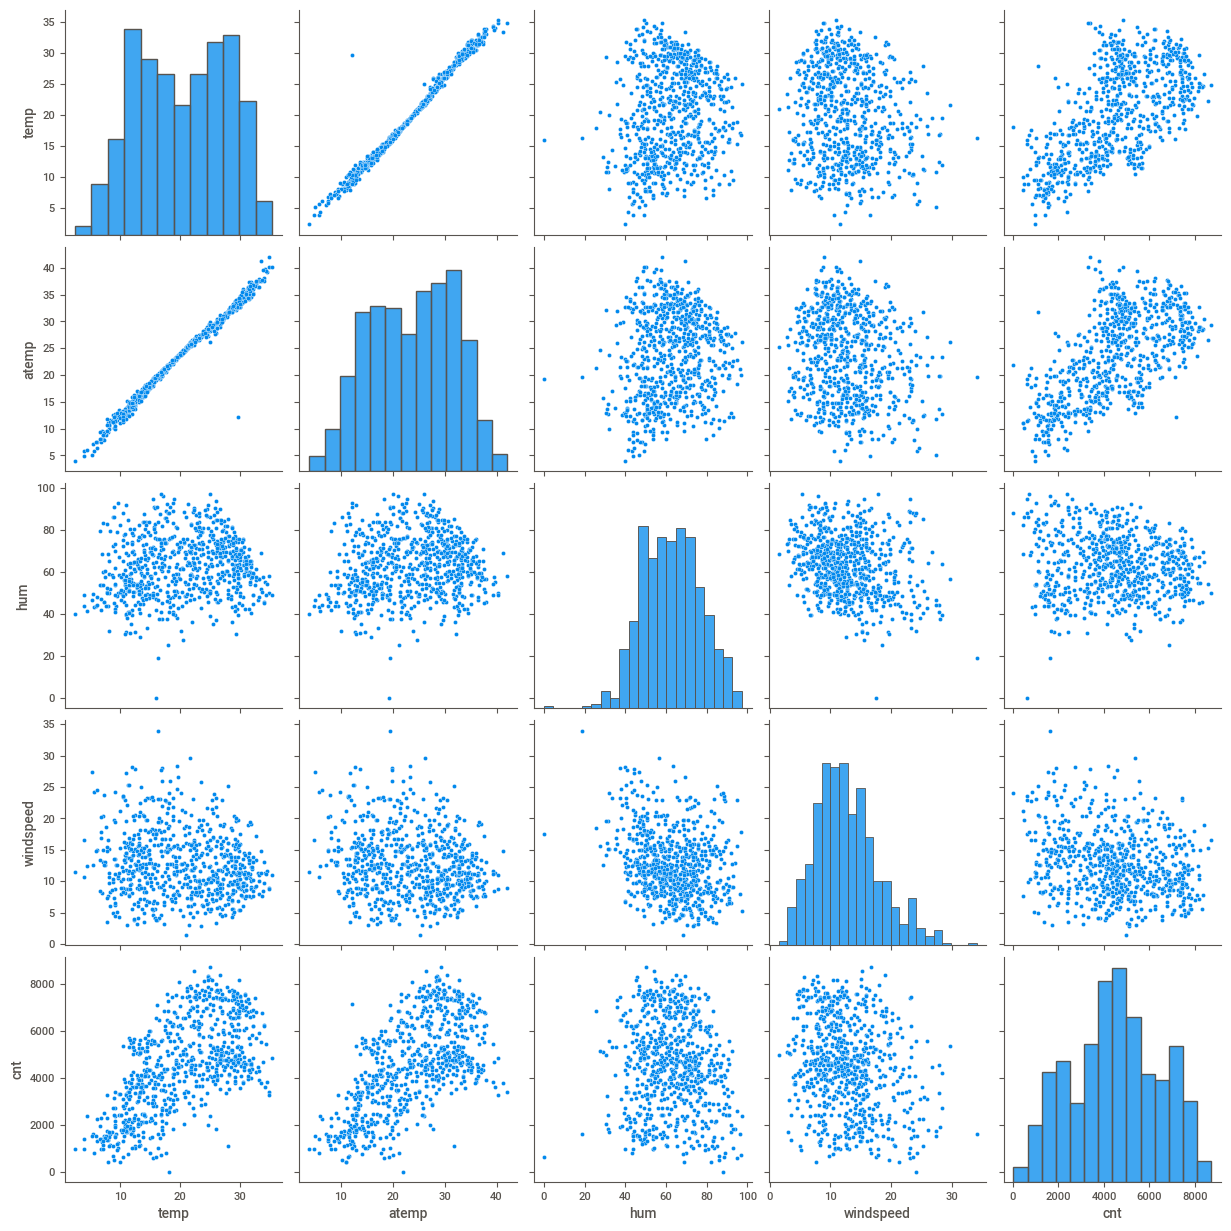

In [10]:
##visualizing the data with numberical variables
bike_data_numerical=bike_data[[ 'temp', 'atemp', 'hum', 'windspeed','cnt']]
sns.pairplot(bike_data_numerical)
plt.show()

Plotting a correlation matrix between variables to know the exact values of correlation between these variables.

In [11]:
# Correlation matrix
cor = bike_data_numerical.corr()
cor

,temp,atemp,hum,windspeed,cnt
temp,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,0.991696,1.000000,0.141512,-0.183876,0.630685
hum,0.128565,0.141512,1.000000,-0.248506,-0.098543
windspeed,-0.158186,-0.183876,-0.248506,1.000000,-0.235132
cnt,0.627044,0.630685,-0.098543,-0.235132,1.000000


From above pairplots, and correlation matrix, it looks temp, atemp looks to have a linear relation with cnt. Other variables doesnt looks to be showing a clear linear trend

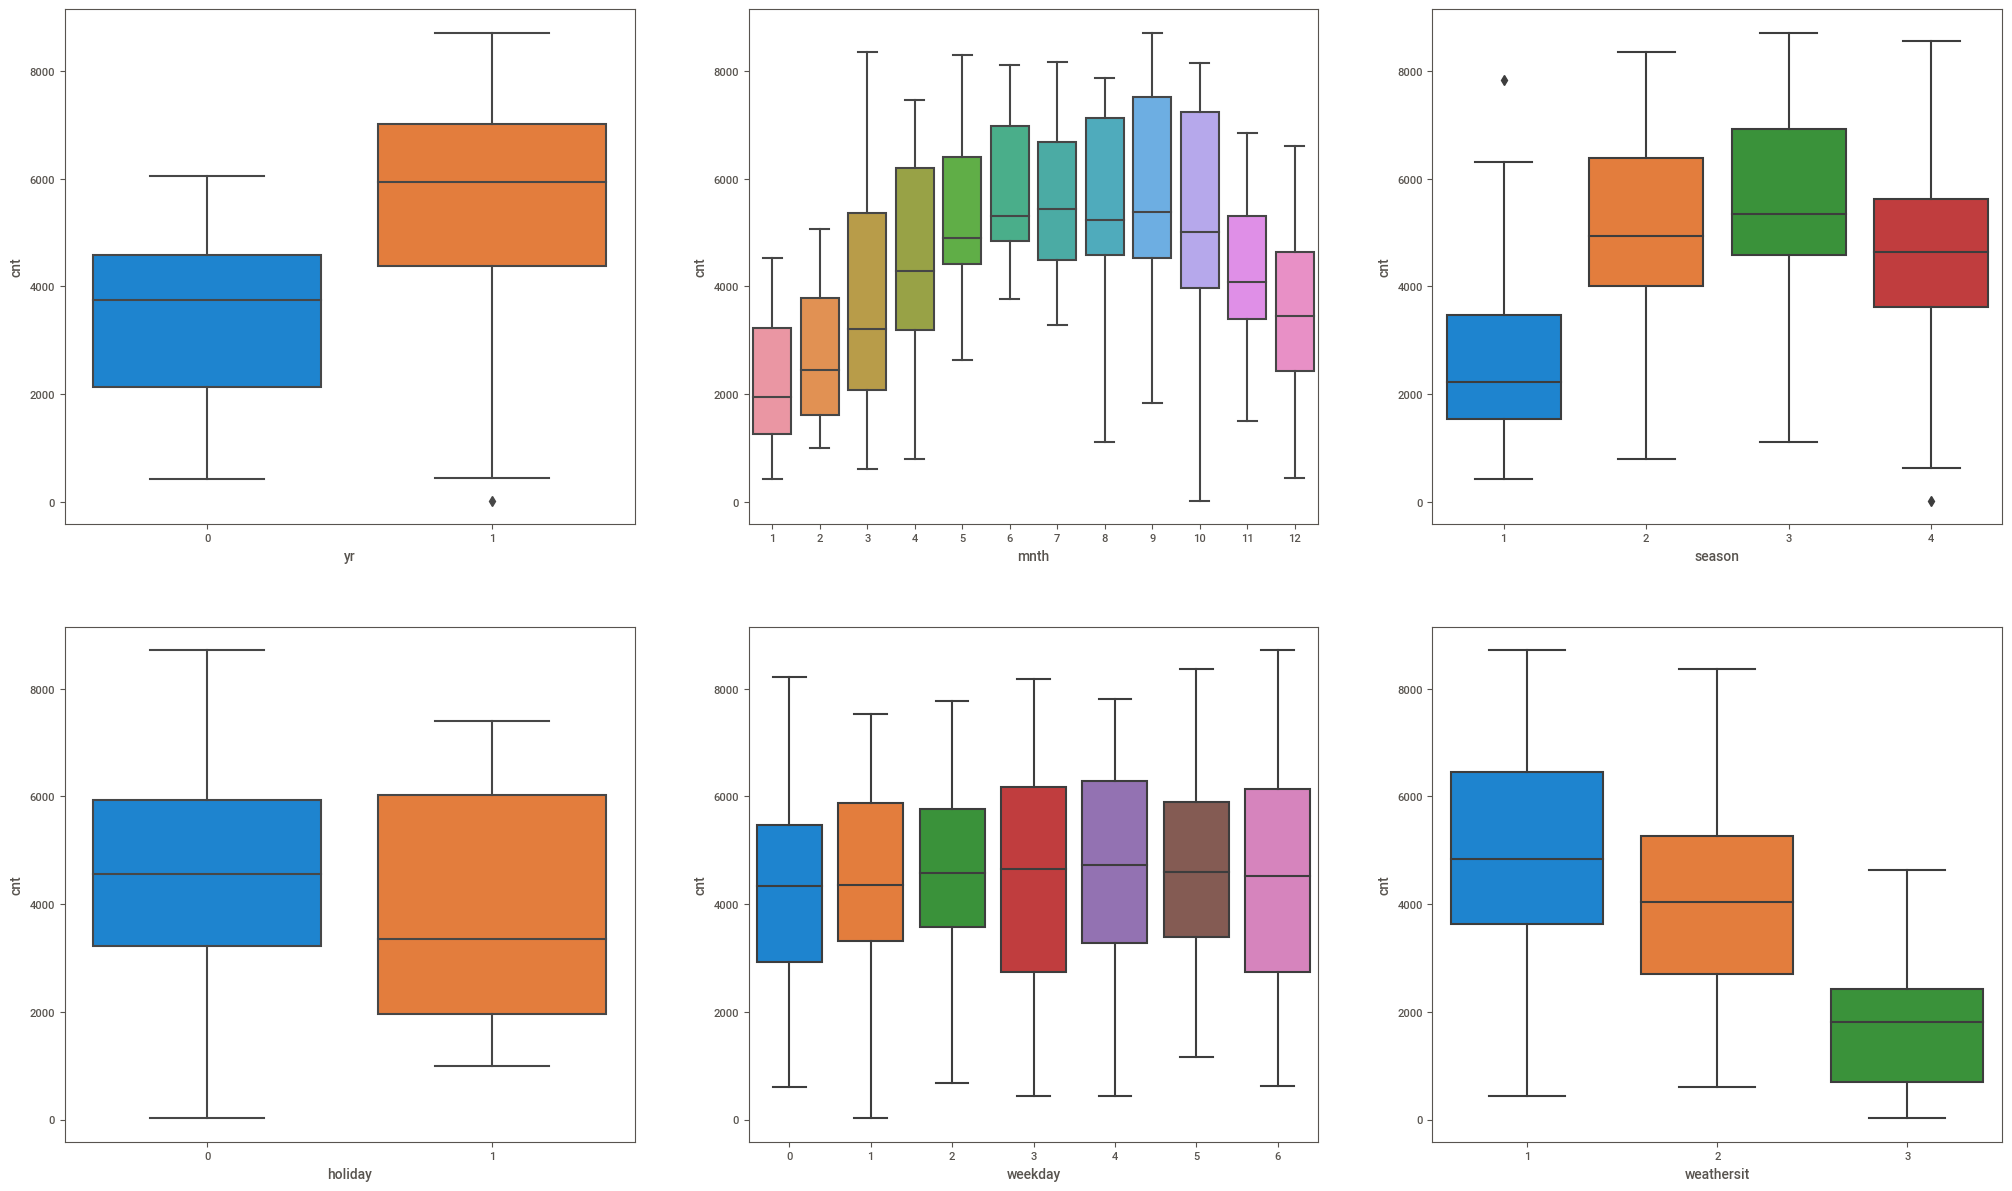

In [12]:
#Create Box Plot for categorical variables before split
plt.figure(figsize=(25, 15))
plt.subplot(2,3,1)
sns.boxplot(x = 'yr', y = 'cnt', data = bike_data)
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike_data)
plt.subplot(2,3,3)
sns.boxplot(x = 'season', y = 'cnt', data = bike_data)
plt.subplot(2,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_data)
plt.subplot(2,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_data)
plt.subplot(2,3,6)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_data)
plt.show()

Observations:
- The cnt for the year 2019 is more than the year 2018. So this indicates there is increase in demand from year 2018 to 2019.
- cnt for the months (5,6,7,8,9,10) is more compared to other months. `So mnth column can be possible predictor of cnt`
- season 3 has higher booking, and there is no much significant differnce between season 2, season 4. season 1 has lowest cnt. `So possible season can be one of the predictors.`
- The cnt are more on a workingday (holiday = 0). `So workingday might be a possible predictor.`
- As per the above plot there is very small / negligible difference on the cnt variable for all weekdays. `So, weekday, from the initial observation doesnt look to be a very good predictor of the bookings (cnt)`.
-When the weather is Clear (weathersit:1), the cnt is more as compared to other weather conditions.  `So this is indicating weather has significance in terms of  predicting the model.`



## Dummy Variables
- There are some columns which captures captegorical variables, dummy variables need to be introduced to process such columns. The below columns are identified further analysis.
- yr - This column has only values of 0 or 1, where 0 indicates year 2018, 1:2019. So its already a binary variable so no need to introduce  a dummy variable.
- **`mnth - This has the data about the month number. So dummy variable will be introduced indicating each month (11 dummy variables in this case)`**
- **`season - There are 4 seasons as per the data dictionary, so dummy variables will be introduced. indicating the wheather (3 dummy variables in this case)`**
- holiday: This column has only values of 0 or 1. So its already a binary variable so no need to introduce  a dummy variable.
- **`weekday: This has the data about the day of the week. So dummy variable will be introduced indicating each weekday (6 dummy variables)`**
- workingday: This column has only values of 0 or 1. So its already a binary variable so no need to introduce  a dummy variable.
- **`weathersit: There are 4 categories of wheathersit as per the data dictionary, so dummy variables will be introduced. indicating the wheather (3 dummy variables in this case)`**

So the highlighted columns above will has the dummy variables created

As these columns (mnth, season,weekday,wheathersit) doesnt actually enforce any strict ordering corresponding category strings will be created

In [13]:
#encoding mnth column
bike_data['mnth'] = bike_data['mnth'].map(
    {1:'Jan',2:'Feb',3:'Mar',
     4:'Apr',5:'May',6:'Jun',
     7:'Jul',8:'Aug',9:'Sep',
     10:'Oct',11:'Nov',12:'Dec'})
#Convert the data type as Category
bike_data['mnth'] = bike_data['mnth'].astype('category')

In [14]:
#encoding season column
bike_data['season'] = bike_data['season'].map(
    {1:'spring',2:'summer',3:'fall',4:'winter'})
#Convert the data type as Category
bike_data['season'] = bike_data['season'].astype('category')

In [15]:
#encoding weekday column
bike_data['weekday'] = bike_data['weekday'].map(
    {0:'Sun',1:'Mon',2:'Tue',3:'Wed',
     4:'Thu',5:'Fri',6:'Sat'})
#Convert the data type as Category
bike_data['weekday'] = bike_data['weekday'].astype('category')

In [16]:
#encoding weathersit column
bike_data['weathersit'] = bike_data['weathersit'].map(
    {1:'Clear',2:'Mist',3:'Light_Snow_Rain',4:'Heavy_Snow_Rain'})
#Convert the data type as Category
bike_data['weathersit'] = bike_data['weathersit'].astype('category')

In [17]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(4), float64(4), int64(4)
memory usage: 49.7 KB


In [18]:
#dummy variable for mnth
month = pd.get_dummies(bike_data['mnth'])
month.head()

,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0


In [19]:
# There are 12 dummy variable created. As its possible to represent the same data with 11 variables dropping 1st column
month = pd.get_dummies(bike_data['mnth'],drop_first=True)
month.head()

,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [20]:
#concat dummy data frame of month with original
bike_data = pd.concat([bike_data,month],axis=1)
bike_data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,spring,0,Jan,0,Sat,0,Mist,14.110847,18.18125,80.5833,...,0,0,1,0,0,0,0,0,0,0
1,spring,0,Jan,0,Sun,0,Mist,14.902598,17.68695,69.6087,...,0,0,1,0,0,0,0,0,0,0
2,spring,0,Jan,0,Mon,1,Clear,8.050924,9.47025,43.7273,...,0,0,1,0,0,0,0,0,0,0
3,spring,0,Jan,0,Tue,1,Clear,8.200000,10.60610,59.0435,...,0,0,1,0,0,0,0,0,0,0
4,spring,0,Jan,0,Wed,1,Clear,9.305237,11.46350,43.6957,...,0,0,1,0,0,0,0,0,0,0


In [21]:
#drop month variable, as dummy variables are already created
bike_data = bike_data.drop('mnth',axis=1)
bike_data.head()

,season,yr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,...,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,spring,0,0,Sat,0,Mist,14.110847,18.18125,80.5833,10.749882,...,0,0,1,0,0,0,0,0,0,0
1,spring,0,0,Sun,0,Mist,14.902598,17.68695,69.6087,16.652113,...,0,0,1,0,0,0,0,0,0,0
2,spring,0,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,...,0,0,1,0,0,0,0,0,0,0
3,spring,0,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,...,0,0,1,0,0,0,0,0,0,0
4,spring,0,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,...,0,0,1,0,0,0,0,0,0,0


Same will be followed for other categorical variables as well.

In [22]:
#Dummy data creation for season
season = pd.get_dummies(bike_data['season'],drop_first = True)
#concat dummt data frame of season with original
bike_data = pd.concat([bike_data,season],axis=1)
#drop season variable, as dummy variables are already created
bike_data = bike_data.drop('season',axis=1)


In [23]:
#Dummy data creation for weekday
weekday = pd.get_dummies(bike_data['weekday'],drop_first = True)
#concat dummt data frame of weekday with original
bike_data = pd.concat([bike_data,weekday],axis=1)
#drop weekday variable, as dummy variables are already created
bike_data = bike_data.drop('weekday',axis=1)

In [24]:
#Dummy data creation for weathersit
weathersit = pd.get_dummies(bike_data['weathersit'],drop_first = True)
#concat dummt data frame of weathersit with original
bike_data = pd.concat([bike_data,weathersit],axis=1)
#drop weathersit variable, as dummy variables are already created
bike_data = bike_data.drop('weathersit',axis=1)

In [25]:
bike_data.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Aug,Dec,...,summer,winter,Mon,Sat,Sun,Thu,Tue,Wed,Light_Snow_Rain,Mist
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,0,0,0,1,0,0


In [26]:
bike_data.shape

(730, 30)

In [27]:
bike_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   yr               730 non-null    int64  
 1   holiday          730 non-null    int64  
 2   workingday       730 non-null    int64  
 3   temp             730 non-null    float64
 4   atemp            730 non-null    float64
 5   hum              730 non-null    float64
 6   windspeed        730 non-null    float64
 7   cnt              730 non-null    int64  
 8   Aug              730 non-null    uint8  
 9   Dec              730 non-null    uint8  
 10  Feb              730 non-null    uint8  
 11  Jan              730 non-null    uint8  
 12  Jul              730 non-null    uint8  
 13  Jun              730 non-null    uint8  
 14  Mar              730 non-null    uint8  
 15  May              730 non-null    uint8  
 16  Nov              730 non-null    uint8  
 17  Oct             

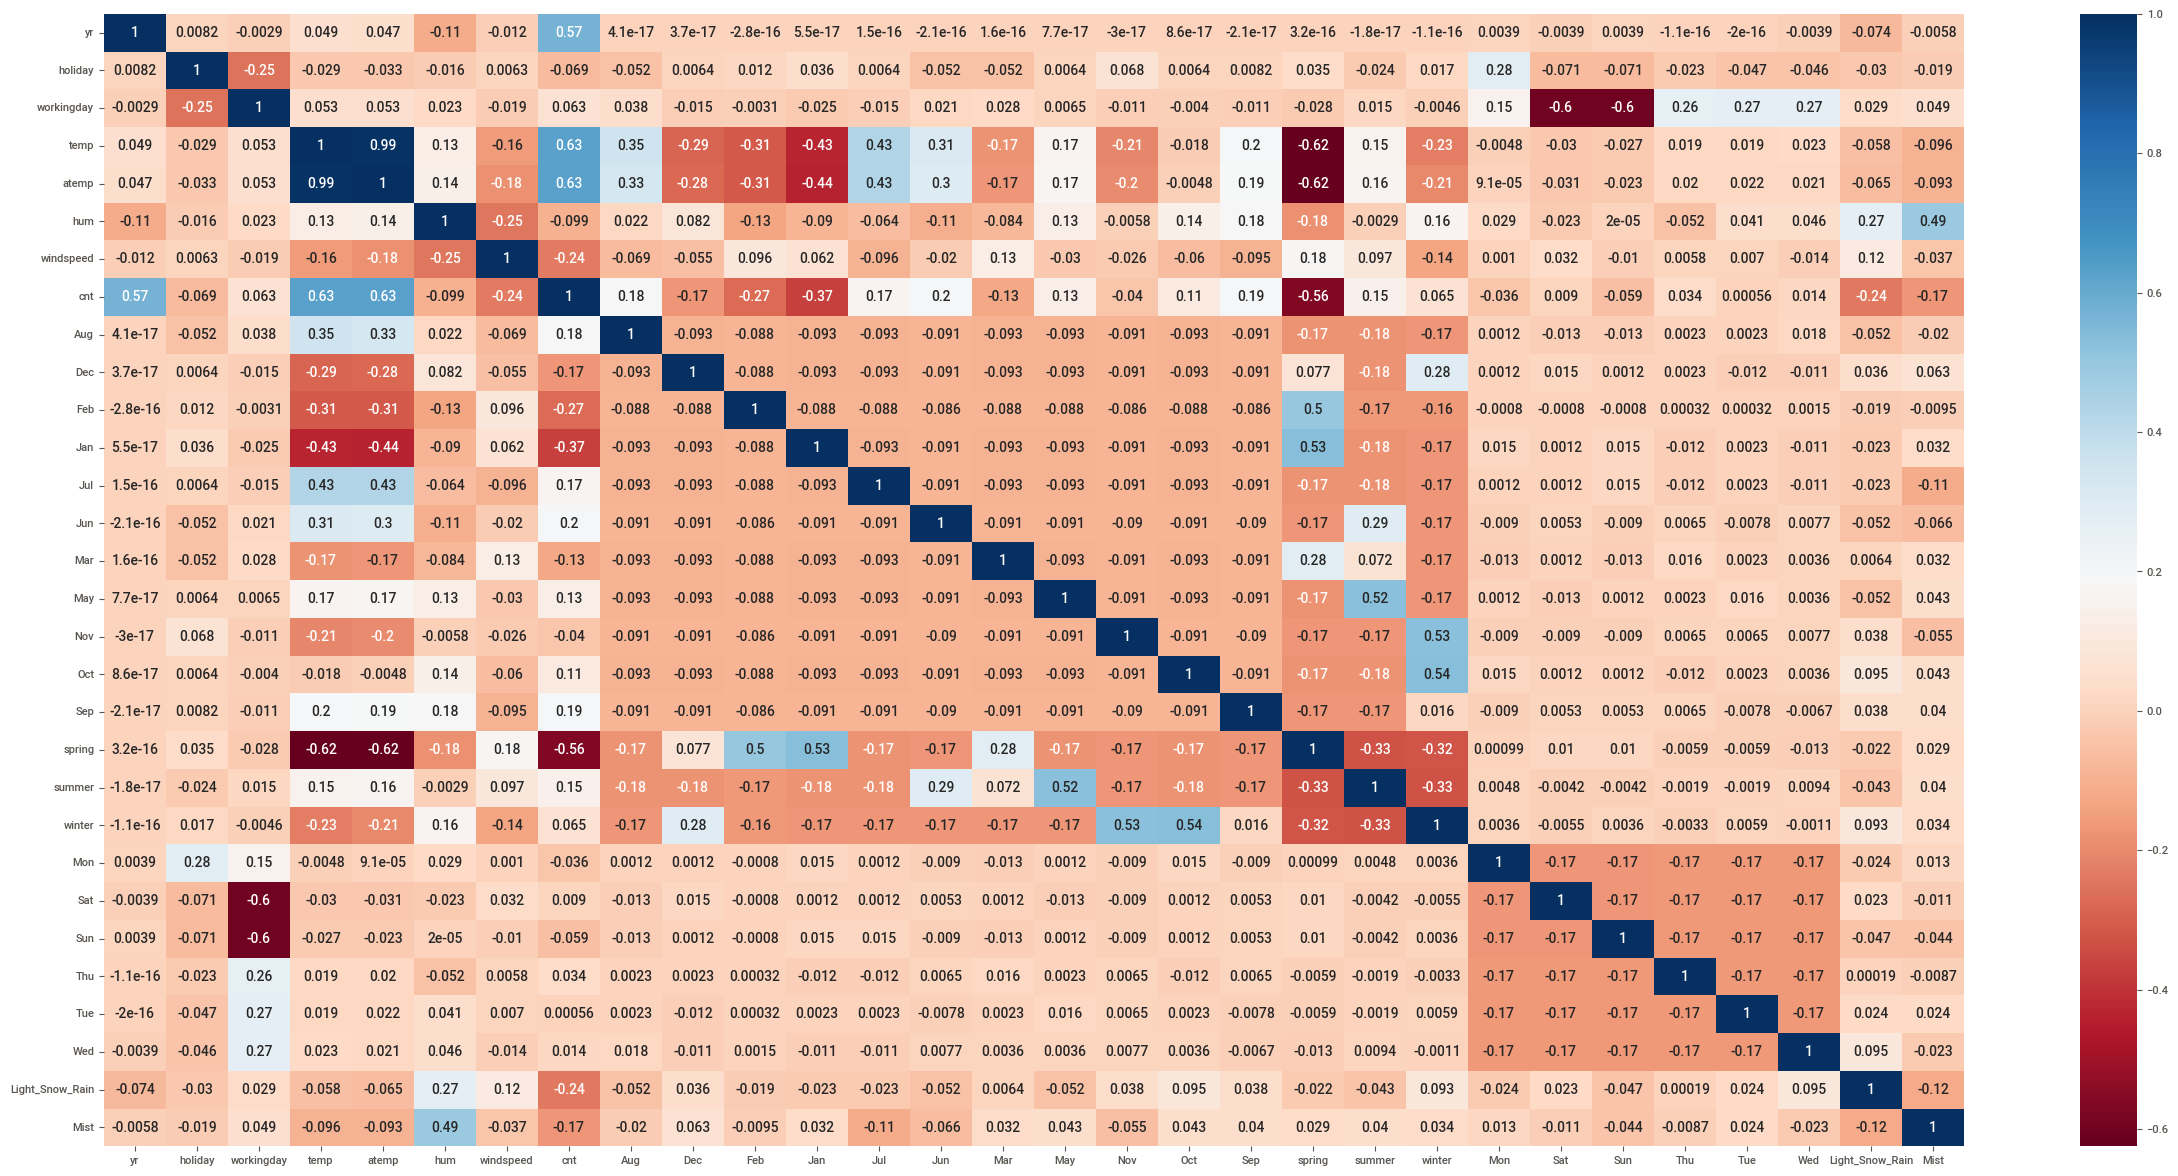

In [28]:
#Check from heatmap on the correlation coefficients 
# to understand the variables with highest correlation
plt.figure(figsize = (30,15))
sns.heatmap(bike_data.corr(), annot = True, cmap="RdBu")
plt.show()

As per the heatmap, the features which has higher correlation with demand (`cnt`) is `temp`, `atemp`, as compared to other features.

# Step 2: Preparing the data for model (train-test split)

In [29]:
#splitting the data
bike_data_train,bike_data_test = train_test_split(bike_data,train_size=0.7,random_state=100)

In [30]:
#Check the share of training data set
print(bike_data_train.shape)

(510, 30)


In [31]:
#Check the share of test data set
print(bike_data_test.shape)

(220, 30)


## Rescaling the Features: 
- The features are scaled for better understanding / interpraetation. In current model Min-Max method is used. [Min-Max scaling takes care of outliers, as all data is compressed between 0 and 1]
Only the numberical variables are considered for scaling. Other categorical varaibles are retained as is.

In [32]:
#Rescale using min-max
# 1. Instantiate an object
scaler = MinMaxScaler()

#create list of number variables for scaling
numerical_vars = ['temp','atemp','hum','windspeed','cnt']
# 2. Fit on Data
bike_data_train[numerical_vars] = scaler.fit_transform(bike_data_train[numerical_vars])
bike_data_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Aug,Dec,...,summer,winter,Mon,Sat,Sun,Thu,Tue,Wed,Light_Snow_Rain,Mist
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,1,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,0,...,1,0,0,1,0,0,0,0,0,1
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,0,...,1,0,0,0,0,0,0,0,0,1


# Step 3: Trainining the Model

In [33]:
#y_train will be taking 'cnt' column as its dependent variable
y_train = bike_data_train.pop('cnt') 
#X_train will  have rest of the independent variables
X_train = bike_data_train
X_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,Aug,Dec,Feb,...,summer,winter,Mon,Sat,Sun,Thu,Tue,Wed,Light_Snow_Rain,Mist
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0,0,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0,1,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0,0,0,...,1,0,0,1,0,0,0,0,0,1
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0,0,0,...,1,0,0,0,0,0,0,0,0,1


In [34]:
y_train.head()

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
Name: cnt, dtype: float64

- Backward Elimination Technique:
    - Using backward elimination technique to see, if the model can converge.

In [35]:
#Build a model with all the variables
X_train_sm = sm.add_constant(X_train)
lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     99.37
Date:                Tue, 14 Mar 2023   Prob (F-statistic):          2.81e-180
Time:                        17:21:15   Log-Likelihood:                 527.12
No. Observations:                 510   AIC:                            -996.2
Df Residuals:                     481   BIC:                            -873.4
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2433      0.035      6.887      0.000       0.174       0.313
yr                  0.2325      0.008     28.794      0.000       0.217       0.248
holiday             0.0109      0.024      0.451      0.652      -0.037       0.058
workingday          0.0963      0.012      7.835      0.000       0.072       0.120
temp                0.3880      0.142      2.727      0.007       0.108       0.668
atemp               0.0590      0.138      0.426      0.670      -0.213       0.331
hum                -0.1520      0.039     -3.938      0.000      -0.228      -0.076
windspeed          -0.1836      0.026     -6.962      0.000      -0.235      -0.132
Aug                 0.0223      0.034      0.657      0.511      -0.044       0.089
Dec                -0.0443      0.034     -1.316      0.189      -0.110       0.022
Feb                -0.0323      0.033     -0.980      0.327      -0.097       0.032
Jan                -0.0631      0.034     -1.876      0.061      -0.129       0.003
Jul                -0.0327      0.035     -0.931      0.352      -0.102       0.036
Jun                 0.0060      0.025      0.241      0.810      -0.043       0.055
Mar                 0.0016      0.025      0.063      0.950      -0.047       0.050
May                 0.0255      0.021      1.208      0.228      -0.016       0.067
Nov                -0.0398      0.036     -1.093      0.275      -0.111       0.032
Oct                 0.0077      0.036      0.215      0.830      -0.063       0.078
Sep                 0.0868      0.032      2.711      0.007       0.024       0.150
spring             -0.0454      0.030     -1.511      0.131      -0.104       0.014
summer              0.0424      0.026      1.617      0.107      -0.009       0.094
winter              0.1071      0.028      3.826      0.000       0.052       0.162
Mon                -0.0216      0.015     -1.401      0.162      -0.052       0.009
Sat                 0.0952      0.014      6.910      0.000       0.068       0.122
Sun                 0.0410      0.014      2.929      0.004       0.013       0.068
Thu                -0.0097      0.016     -0.623      0.534      -0.040       0.021
Tue                -0.0184      0.016     -1.184      0.237      -0.049       0.012
Wed                -0.0059      0.015     -0.394      0.694      -0.035       0.023
Light_Snow_Rain    -0.2550      0.026     -9.631      0.000      -0.307      -0.203
Mist               -0.0595      0.010     -5.701      0.000      -0.080      -0.039
==============================================================================
Omnibus:                       84.490   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              234.656
Skew:                          -0.805   Prob(JB):                     1.11

Without eliminating any variables the model has R-Squared as 85.3% and adjusted R-Squared of 84.4%. So the model looks good.The variables which are not significant will be eliminated, and model will be re-evaluated, subsequently to see how R-Squared is getting impacted.

In [36]:
#Calclulate VIF
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending=False)
vif

,Features,VIF
2,workingday,85.56
3,temp,66.90
4,atemp,56.03
22,Sat,19.71
23,Sun,18.34
18,spring,10.77
20,winter,9.46
19,summer,8.29
15,Nov,6.79
16,Oct,6.47


Handling Variables:

- High p-value, high VIF - Drop such variables straighaway
- High -Low:
  - High p-value, Low VIF: Remove these variables first
  - Low p-value, high VIF: Remove these variables after the ones above
- Low p-value, low VIF - Keep Such variables

We have column Oct with high p-value, and high VIF

As atemp has higher VIF (56.02), and higher p-value (0.670) dropping the variable

In [37]:
#Drop atemp
X = X_train.drop('atemp',axis=1)

In [38]:
#Create another model
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     103.2
Date:                Tue, 14 Mar 2023   Prob (F-statistic):          3.00e-181
Time:                        17:21:15   Log-Likelihood:                 527.03
No. Observations:                 510   AIC:                            -998.1
Df Residuals:                     482   BIC:                            -879.5
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2431      0.035      6.888      0.000       0.174       0.312
yr                  0.2324      0.008     28.819      0.000       0.217       0.248
holiday             0.0100      0.024      0.418      0.676      -0.037       0.057
workingday          0.0962      0.012      7.835      0.000       0.072       0.120
temp                0.4454      0.046      9.628      0.000       0.354       0.536
hum                -0.1515      0.039     -3.929      0.000      -0.227      -0.076
windspeed          -0.1860      0.026     -7.226      0.000      -0.237      -0.135
Aug                 0.0204      0.034      0.607      0.544      -0.046       0.086
Dec                -0.0443      0.034     -1.317      0.189      -0.110       0.022
Feb                -0.0324      0.033     -0.985      0.325      -0.097       0.032
Jan                -0.0633      0.034     -1.885      0.060      -0.129       0.003
Jul                -0.0338      0.035     -0.969      0.333      -0.102       0.035
Jun                 0.0046      0.025      0.186      0.853      -0.044       0.053
Mar                 0.0013      0.025      0.052      0.959      -0.047       0.050
May                 0.0247      0.021      1.173      0.241      -0.017       0.066
Nov                -0.0399      0.036     -1.096      0.274      -0.111       0.032
Oct                 0.0075      0.036      0.210      0.834      -0.063       0.078
Sep                 0.0859      0.032      2.692      0.007       0.023       0.149
spring             -0.0448      0.030     -1.496      0.135      -0.104       0.014
summer              0.0430      0.026      1.645      0.101      -0.008       0.094
winter              0.1076      0.028      3.853      0.000       0.053       0.163
Mon                -0.0209      0.015     -1.365      0.173      -0.051       0.009
Sat                 0.0956      0.014      6.958      0.000       0.069       0.123
Sun                 0.0413      0.014      2.964      0.003       0.014       0.069
Thu                -0.0091      0.016     -0.588      0.557      -0.040       0.021
Tue                -0.0179      0.016     -1.156      0.248      -0.048       0.013
Wed                -0.0055      0.015     -0.368      0.713      -0.035       0.024
Light_Snow_Rain    -0.2558      0.026     -9.699      0.000      -0.308      -0.204
Mist               -0.0596      0.010     -5.709      0.000      -0.080      -0.039
==============================================================================
Omnibus:                       83.722   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              231.841
Skew:                          -0.799   Prob(JB):                     4.53e-51
Kurtosis:                       5.891   Cond. No.                     7.26e+15


In [39]:
#ReCalclulate VIF
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending=False)
vif

,Features,VIF
2,workingday,85.54
21,Sat,19.71
22,Sun,18.34
17,spring,10.75
19,winter,9.44
18,summer,8.27
3,temp,7.08
14,Nov,6.79
15,Oct,6.47
6,Aug,6.36


As month Oct has higher p-value(0.834), and higher VIF ( 6.47 > 5) dropping this column

In [40]:
#Drop Oct
X = X.drop('Oct',axis=1)

In [41]:
#Create another model
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     107.4
Date:                Tue, 14 Mar 2023   Prob (F-statistic):          2.93e-182
Time:                        17:21:15   Log-Likelihood:                 527.00
No. Observations:                 510   AIC:                            -1000.
Df Residuals:                     483   BIC:                            -885.7
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2456      0.033      7.416      0.000       0.181       0.311
yr                  0.2324      0.008     28.863      0.000       0.217       0.248
holiday             0.0109      0.024      0.461      0.645      -0.036       0.057
workingday          0.0967      0.012      8.066      0.000       0.073       0.120
temp                0.4450      0.046      9.636      0.000       0.354       0.536
hum                -0.1505      0.038     -3.937      0.000      -0.226      -0.075
windspeed          -0.1860      0.026     -7.232      0.000      -0.237      -0.135
Aug                 0.0170      0.029      0.578      0.563      -0.041       0.075
Dec                -0.0499      0.020     -2.446      0.015      -0.090      -0.010
Feb                -0.0360      0.028     -1.273      0.204      -0.092       0.020
Jan                -0.0669      0.029     -2.316      0.021      -0.124      -0.010
Jul                -0.0372      0.031     -1.201      0.230      -0.098       0.024
Jun                 0.0027      0.023      0.117      0.907      -0.043       0.048
Mar                -0.0014      0.021     -0.067      0.947      -0.043       0.040
May                 0.0235      0.020      1.161      0.246      -0.016       0.063
Nov                -0.0463      0.019     -2.381      0.018      -0.085      -0.008
Sep                 0.0818      0.025      3.269      0.001       0.033       0.131
spring             -0.0448      0.030     -1.497      0.135      -0.104       0.014
summer              0.0407      0.024      1.717      0.087      -0.006       0.087
winter              0.1105      0.024      4.539      0.000       0.063       0.158
Mon                -0.0210      0.015     -1.369      0.172      -0.051       0.009
Sat                 0.0961      0.013      7.150      0.000       0.070       0.123
Sun                 0.0419      0.014      3.065      0.002       0.015       0.069
Thu                -0.0091      0.016     -0.586      0.558      -0.040       0.021
Tue                -0.0180      0.015     -1.160      0.247      -0.048       0.012
Wed                -0.0055      0.015     -0.369      0.712      -0.035       0.024
Light_Snow_Rain    -0.2557      0.026     -9.707      0.000      -0.307      -0.204
Mist               -0.0596      0.010     -5.723      0.000      -0.080      -0.039
==============================================================================
Omnibus:                       83.003   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              229.019
Skew:                          -0.793   Prob(JB):                     1.86e-50
Kurtosis:                       5.874   Cond. No.                     7.27e+15
==============================================================================

Note

In [42]:
#ReCalclulate VIF
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending=False)
vif

,Features,VIF
2,workingday,76.07
20,Sat,17.49
21,Sun,16.31
16,spring,10.75
18,winter,7.18
3,temp,7.08
17,summer,6.81
6,Aug,4.86
10,Jul,4.42
9,Jan,4.37


As there are no common columns with high p (>5), and VIF values. Checking for columnf with high p - Month of Mar (March) 

In [43]:
#Drop Mar
X = X.drop('Mar',axis=1)

In [44]:
#Create another model
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     111.9
Date:                Tue, 14 Mar 2023   Prob (F-statistic):          2.74e-183
Time:                        17:21:15   Log-Likelihood:                 527.00
No. Observations:                 510   AIC:                            -1002.
Df Residuals:                     484   BIC:                            -891.9
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2452      0.032      7.585      0.000       0.182       0.309
yr                  0.2324      0.008     28.897      0.000       0.217       0.248
holiday             0.0109      0.024      0.459      0.646      -0.036       0.057
workingday          0.0966      0.012      8.208      0.000       0.073       0.120
temp                0.4455      0.045      9.802      0.000       0.356       0.535
hum                -0.1505      0.038     -3.943      0.000      -0.226      -0.076
windspeed          -0.1859      0.026     -7.249      0.000      -0.236      -0.135
Aug                 0.0172      0.029      0.590      0.555      -0.040       0.074
Dec                -0.0493      0.018     -2.678      0.008      -0.085      -0.013
Feb                -0.0348      0.022     -1.603      0.110      -0.077       0.008
Jan                -0.0656      0.022     -3.011      0.003      -0.108      -0.023
Jul                -0.0370      0.031     -1.201      0.230      -0.098       0.024
Jun                 0.0030      0.023      0.131      0.896      -0.042       0.048
May                 0.0238      0.020      1.219      0.223      -0.015       0.062
Nov                -0.0461      0.019     -2.422      0.016      -0.083      -0.009
Sep                 0.0820      0.025      3.318      0.001       0.033       0.131
spring             -0.0456      0.028     -1.643      0.101      -0.100       0.009
summer              0.0406      0.024      1.717      0.087      -0.006       0.087
winter              0.1107      0.024      4.569      0.000       0.063       0.158
Mon                -0.0210      0.015     -1.372      0.171      -0.051       0.009
Sat                 0.0960      0.013      7.255      0.000       0.070       0.122
Sun                 0.0418      0.014      3.085      0.002       0.015       0.068
Thu                -0.0091      0.015     -0.590      0.556      -0.040       0.021
Tue                -0.0180      0.015     -1.162      0.246      -0.048       0.012
Wed                -0.0055      0.015     -0.370      0.712      -0.035       0.024
Light_Snow_Rain    -0.2557      0.026     -9.717      0.000      -0.307      -0.204
Mist               -0.0596      0.010     -5.729      0.000      -0.080      -0.039
==============================================================================
Omnibus:                       82.911   Durbin-Watson:                   2.048
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              228.194
Skew:                          -0.793   Prob(JB):                     2.81e-50
Kurtosis:                       5.867   Cond. No.                     7.30e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly 

In [45]:
#ReCalclulate VIF
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending=False)
vif

,Features,VIF
2,workingday,72.24
19,Sat,16.60
20,Sun,15.58
15,spring,9.25
17,winter,7.12
3,temp,6.87
16,summer,6.81
6,Aug,4.80
10,Jul,4.39
1,holiday,3.96


In [46]:
#Checking for columnf with high p - Month of Jun (June)
#Drop Jun
X = X.drop('Jun',axis=1)

In [47]:
#Create another model
X_train_sm = sm.add_constant(X)
lr = sm.OLS(y_train,X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.845
Method:                 Least Squares   F-statistic:                     116.8
Date:                Tue, 14 Mar 2023   Prob (F-statistic):          2.53e-184
Time:                        17:21:16   Log-Likelihood:                 526.99
No. Observations:                 510   AIC:                            -1004.
Df Residuals:                     485   BIC:                            -898.1
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2453      0.032      7.603      0.000       0.182       0.309
yr                  0.2323      0.008     29.032      0.000       0.217       0.248
holiday             0.0107      0.024      0.453      0.651      -0.036       0.057
workingday          0.0966      0.012      8.230      0.000       0.074       0.120
temp                0.4487      0.038     11.669      0.000       0.373       0.524
hum                -0.1512      0.038     -4.003      0.000      -0.225      -0.077
windspeed          -0.1862      0.025     -7.313      0.000      -0.236      -0.136
Aug                 0.0150      0.024      0.633      0.527      -0.031       0.061
Dec                -0.0490      0.018     -2.689      0.007      -0.085      -0.013
Feb                -0.0344      0.021     -1.602      0.110      -0.077       0.008
Jan                -0.0650      0.021     -3.059      0.002      -0.107      -0.023
Jul                -0.0395      0.025     -1.600      0.110      -0.088       0.009
May                 0.0226      0.017      1.307      0.192      -0.011       0.057
Nov                -0.0459      0.019     -2.421      0.016      -0.083      -0.009
Sep                 0.0804      0.021      3.748      0.000       0.038       0.123
spring             -0.0466      0.027     -1.747      0.081      -0.099       0.006
summer              0.0401      0.023      1.722      0.086      -0.006       0.086
winter              0.1096      0.023      4.826      0.000       0.065       0.154
Mon                -0.0209      0.015     -1.370      0.171      -0.051       0.009
Sat                 0.0961      0.013      7.298      0.000       0.070       0.122
Sun                 0.0419      0.013      3.105      0.002       0.015       0.068
Thu                -0.0092      0.015     -0.591      0.555      -0.040       0.021
Tue                -0.0180      0.015     -1.164      0.245      -0.048       0.012
Wed                -0.0055      0.015     -0.367      0.714      -0.035       0.024
Light_Snow_Rain    -0.2556      0.026     -9.726      0.000      -0.307      -0.204
Mist               -0.0595      0.010     -5.737      0.000      -0.080      -0.039
==============================================================================
Omnibus:                       82.670   Durbin-Watson:                   2.047
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              226.459
Skew:                          -0.792   Prob(JB):                     6.69e-50
Kurtosis:                       5.854   Cond. No.                     7.24e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.01e-29. This might indicate that there a

In [48]:
#ReCalclulate VIF
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF',ascending=False)
vif

,Features,VIF
2,workingday,72.11
18,Sat,16.55
19,Sun,15.54
14,spring,8.55
15,summer,6.60
16,winter,6.27
3,temp,4.92
1,holiday,3.96
6,Aug,3.17
10,Jul,2.81


* As the feature elemination with this process is tedious and convergence might take more time, we will try to follow RFE (Recursive Feature elimination) 

## Recursive Feature Elimination Method (RFE): 
- As the number of features are more convergence takes longer time. So RFE is being used for feature elimination, taking initial Number of features as 15. statsmodels library is used to build models using the selected features.

Handling Variables:

- High p-value, high VIF - Drop such variables straighaway
- High -Low:
  - High p-value, Low VIF: Remove these variables first
  - Low p-value, high VIF: Remove these variables after the ones above
- Low p-value, low VIF - Keep Such variables

In [49]:
# Recursive feature elimination 
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, n_features_to_select=15)
rfe = rfe.fit(X_train, y_train)

In [50]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 5),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('Aug', False, 7),
 ('Dec', False, 3),
 ('Feb', False, 4),
 ('Jan', True, 1),
 ('Jul', True, 1),
 ('Jun', False, 14),
 ('Mar', False, 15),
 ('May', False, 6),
 ('Nov', False, 2),
 ('Oct', False, 13),
 ('Sep', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Mon', False, 9),
 ('Sat', True, 1),
 ('Sun', False, 8),
 ('Thu', False, 11),
 ('Tue', False, 10),
 ('Wed', False, 12),
 ('Light_Snow_Rain', True, 1),
 ('Mist', True, 1)]

In [51]:
#check the columns selected
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed', 'Jan', 'Jul',
       'Sep', 'spring', 'summer', 'winter', 'Sat', 'Light_Snow_Rain', 'Mist'],
      dtype='object')

Build Model Using StatsModel

In [52]:
X_train_rfe = X_train[col]

In [53]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,29.37
3,temp,17.78
2,workingday,5.31
5,windspeed,4.73
9,spring,4.53
11,winter,3.46
10,summer,2.85
14,Mist,2.29
0,yr,2.09
12,Sat,1.98


In [54]:
X_train_rfe = sm.add_constant(X_train_rfe)

In [55]:
lm_model1 = sm.OLS(y_train,X_train_rfe).fit()
lm_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.0
Date:                Tue, 14 Mar 2023   Prob (F-statistic):          4.22e-191
Time:                        17:21:16   Log-Likelihood:                 519.65
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2519      0.036      6.969      0.000       0.181       0.323
yr                  0.2305      0.008     28.795      0.000       0.215       0.246
holiday            -0.0582      0.027     -2.164      0.031      -0.111      -0.005
workingday          0.0433      0.012      3.762      0.000       0.021       0.066
temp                0.5096      0.034     14.837      0.000       0.442       0.577
hum                -0.1563      0.037     -4.188      0.000      -0.230      -0.083
windspeed          -0.1863      0.025     -7.310      0.000      -0.236      -0.136
Jan                -0.0345      0.017     -1.989      0.047      -0.069      -0.000
Jul                -0.0529      0.018     -2.931      0.004      -0.088      -0.017
Sep                 0.0814      0.016      4.945      0.000       0.049       0.114
spring             -0.0509      0.021     -2.464      0.014      -0.091      -0.010
summer              0.0508      0.015      3.423      0.001       0.022       0.080
winter              0.0933      0.017      5.403      0.000       0.059       0.127
Sat                 0.0536      0.014      3.694      0.000       0.025       0.082
Light_Snow_Rain    -0.2475      0.026     -9.507      0.000      -0.299      -0.196
Mist               -0.0563      0.010     -5.439      0.000      -0.077      -0.036
==============================================================================
Omnibus:                       66.260   Durbin-Watson:                   2.080
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              159.826
Skew:                          -0.678   Prob(JB):                     1.97e-35
Kurtosis:                       5.383   Cond. No.                         22.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

After selecting on limited features(15), the R-Squared has become 84.8%, and adjusted R-Squared is 84.4%. So there is very small / neglibile difference with the original values. So proceeding further with this model.

- At each step VIF will be evaluated to check on multicolliniarity among the variables.

P value of all varaibles is less than 0.05. Check for VIF

In [56]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,84.60
10,spring,5.08
4,temp,3.89
12,winter,3.59
11,summer,2.65
5,hum,1.91
3,workingday,1.88
13,Sat,1.78
7,Jan,1.57
15,Mist,1.57


In [57]:
X_train_new = X_train_rfe.drop(['const'], axis=1)

In [58]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,hum,29.37
3,temp,17.78
2,workingday,5.31
5,windspeed,4.73
9,spring,4.53
11,winter,3.46
10,summer,2.85
14,Mist,2.29
0,yr,2.09
12,Sat,1.98


As `hum` has hugher VIF value dropping this variable

In [59]:
X_train_new = X_train_new.drop(["hum"],axis=1)
X_train_lm = sm.add_constant(X_train_new)
lm_model2 = sm.OLS(y_train,X_train_lm).fit()

#Check Summary
lm_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     189.6
Date:                Tue, 14 Mar 2023   Prob (F-statistic):          1.60e-188
Time:                        17:21:16   Log-Likelihood:                 510.75
No. Observations:                 510   AIC:                            -991.5
Df Residuals:                     495   BIC:                            -928.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1737      0.031      5.520      0.000       0.112       0.235
yr                  0.2345      0.008     29.009      0.000       0.219       0.250
holiday            -0.0558      0.027     -2.042      0.042      -0.109      -0.002
workingday          0.0464      0.012      3.966      0.000       0.023       0.069
temp                0.4722      0.034     14.005      0.000       0.406       0.538
windspeed          -0.1563      0.025     -6.286      0.000      -0.205      -0.107
Jan                -0.0392      0.018     -2.227      0.026      -0.074      -0.005
Jul                -0.0479      0.018     -2.614      0.009      -0.084      -0.012
Sep                 0.0755      0.017      4.527      0.000       0.043       0.108
spring             -0.0599      0.021     -2.867      0.004      -0.101      -0.019
summer              0.0445      0.015      2.967      0.003       0.015       0.074
winter              0.0784      0.017      4.562      0.000       0.045       0.112
Sat                 0.0583      0.015      3.968      0.000       0.029       0.087
Light_Snow_Rain    -0.2908      0.024    -11.977      0.000      -0.339      -0.243
Mist               -0.0813      0.009     -9.437      0.000      -0.098      -0.064
==============================================================================
Omnibus:                       67.830   Durbin-Watson:                   2.076
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              164.565
Skew:                          -0.692   Prob(JB):                     1.84e-36
Kurtosis:                       5.415   Cond. No.                         20.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [60]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,7.07
2,workingday,5.24
4,windspeed,4.68
8,spring,3.07
9,summer,2.34
0,yr,2.08
10,winter,1.98
11,Sat,1.97
5,Jan,1.62
6,Jul,1.59


From the above stats, there are 2 variables `temp`, `workingday` with higer VIF.  Though `temp` has the higher VIF value, we wanted to retain considering temp was showing linear relation, and has hugher correlation as per the initial observation. So `workingday` param will be dropped

In [61]:
X_train_new = X_train_new.drop(["workingday"],axis=1)
X_train_lm = sm.add_constant(X_train_new)
lm_model3 = sm.OLS(y_train,X_train_lm).fit()

#Check Summary
lm_model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     197.1
Date:                Tue, 14 Mar 2023   Prob (F-statistic):          2.48e-186
Time:                        17:21:16   Log-Likelihood:                 502.77
No. Observations:                 510   AIC:                            -977.5
Df Residuals:                     496   BIC:                            -918.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2120      0.030      6.978      0.000       0.152       0.272
yr                  0.2347      0.008     28.620      0.000       0.219       0.251
holiday            -0.0934      0.026     -3.589      0.000      -0.144      -0.042
temp                0.4734      0.034     13.837      0.000       0.406       0.541
windspeed          -0.1570      0.025     -6.226      0.000      -0.207      -0.107
Jan                -0.0386      0.018     -2.159      0.031      -0.074      -0.003
Jul                -0.0508      0.019     -2.735      0.006      -0.087      -0.014
Sep                 0.0762      0.017      4.504      0.000       0.043       0.109
spring             -0.0615      0.021     -2.902      0.004      -0.103      -0.020
summer              0.0437      0.015      2.871      0.004       0.014       0.074
winter              0.0755      0.017      4.334      0.000       0.041       0.110
Sat                 0.0201      0.011      1.787      0.075      -0.002       0.042
Light_Snow_Rain    -0.2859      0.025    -11.619      0.000      -0.334      -0.238
Mist               -0.0794      0.009     -9.097      0.000      -0.097      -0.062
==============================================================================
Omnibus:                       66.209   Durbin-Watson:                   2.059
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              142.692
Skew:                          -0.716   Prob(JB):                     1.03e-31
Kurtosis:                       5.160   Cond. No.                         17.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [62]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.16
3,windspeed,4.64
7,spring,2.76
8,summer,2.24
0,yr,2.07
9,winter,1.80
4,Jan,1.61
5,Jul,1.59
12,Mist,1.56
6,Sep,1.34


As `Sat` has higher p-value readjust the model dropping the same

In [63]:
X_train_new = X_train_new.drop(["Sat"],axis=1)
X_train_lm = sm.add_constant(X_train_new)
lm_model4 = sm.OLS(y_train,X_train_lm).fit()

#Check Summary
lm_model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     212.3
Date:                Tue, 14 Mar 2023   Prob (F-statistic):          8.14e-187
Time:                        17:21:17   Log-Likelihood:                 501.13
No. Observations:                 510   AIC:                            -976.3
Df Residuals:                     497   BIC:                            -921.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.2154      0.030      7.088      0.000       0.156       0.275
yr                  0.2343      0.008     28.517      0.000       0.218       0.250
holiday            -0.0968      0.026     -3.722      0.000      -0.148      -0.046
temp                0.4721      0.034     13.772      0.000       0.405       0.539
windspeed          -0.1549      0.025     -6.135      0.000      -0.205      -0.105
Jan                -0.0383      0.018     -2.138      0.033      -0.073      -0.003
Jul                -0.0503      0.019     -2.706      0.007      -0.087      -0.014
Sep                 0.0764      0.017      4.506      0.000       0.043       0.110
spring             -0.0617      0.021     -2.905      0.004      -0.103      -0.020
summer              0.0434      0.015      2.845      0.005       0.013       0.073
winter              0.0757      0.017      4.335      0.000       0.041       0.110
Light_Snow_Rain    -0.2854      0.025    -11.575      0.000      -0.334      -0.237
Mist               -0.0793      0.009     -9.067      0.000      -0.096      -0.062
==============================================================================
Omnibus:                       59.886   Durbin-Watson:                   2.058
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              135.021
Skew:                          -0.638   Prob(JB):                     4.79e-30
Kurtosis:                       5.174   Cond. No.                         17.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [64]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.13
3,windspeed,4.62
7,spring,2.75
8,summer,2.24
0,yr,2.07
9,winter,1.78
4,Jan,1.61
5,Jul,1.59
11,Mist,1.56
6,Sep,1.34


In [65]:
#As Jan month has higher p-value, let us check dropping the this column
X_train_new = X_train_new.drop(["Jan"],axis=1)
X_train_lm = sm.add_constant(X_train_new)
lm_model5 = sm.OLS(y_train,X_train_lm).fit()

#Check Summary
lm_model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     229.6
Date:                Tue, 14 Mar 2023   Prob (F-statistic):          5.06e-187
Time:                        17:21:17   Log-Likelihood:                 498.80
No. Observations:                 510   AIC:                            -973.6
Df Residuals:                     498   BIC:                            -922.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1994      0.030      6.746      0.000       0.141       0.258
yr                  0.2336      0.008     28.352      0.000       0.217       0.250
holiday            -0.0975      0.026     -3.736      0.000      -0.149      -0.046
temp                0.4910      0.033     14.770      0.000       0.426       0.556
windspeed          -0.1479      0.025     -5.887      0.000      -0.197      -0.099
Jul                -0.0521      0.019     -2.790      0.005      -0.089      -0.015
Sep                 0.0768      0.017      4.517      0.000       0.043       0.110
spring             -0.0672      0.021     -3.175      0.002      -0.109      -0.026
summer              0.0465      0.015      3.051      0.002       0.017       0.076
winter              0.0817      0.017      4.730      0.000       0.048       0.116
Light_Snow_Rain    -0.2842      0.025    -11.487      0.000      -0.333      -0.236
Mist               -0.0802      0.009     -9.146      0.000      -0.097      -0.063
==============================================================================
Omnibus:                       59.182   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              134.016
Skew:                          -0.629   Prob(JB):                     7.92e-30
Kurtosis:                       5.173   Cond. No.                         17.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [66]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.09
3,windspeed,4.60
7,summer,2.23
6,spring,2.08
0,yr,2.07
8,winter,1.78
4,Jul,1.58
10,Mist,1.55
5,Sep,1.34
9,Light_Snow_Rain,1.08


In [67]:
#As Jul month has higher p-value, let us check dropping the this column
X_train_new = X_train_new.drop(["Jul"],axis=1)
X_train_lm = sm.add_constant(X_train_new)
lm_model6 = sm.OLS(y_train,X_train_lm).fit()

#Check Summary
lm_model6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     248.4
Date:                Tue, 14 Mar 2023   Prob (F-statistic):          1.47e-186
Time:                        17:21:17   Log-Likelihood:                 494.84
No. Observations:                 510   AIC:                            -967.7
Df Residuals:                     499   BIC:                            -921.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1909      0.030      6.447      0.000       0.133       0.249
yr                  0.2341      0.008     28.237      0.000       0.218       0.250
holiday            -0.0963      0.026     -3.668      0.000      -0.148      -0.045
temp                0.4777      0.033     14.423      0.000       0.413       0.543
windspeed          -0.1481      0.025     -5.854      0.000      -0.198      -0.098
Sep                 0.0910      0.016      5.566      0.000       0.059       0.123
spring             -0.0554      0.021     -2.654      0.008      -0.096      -0.014
summer              0.0621      0.014      4.350      0.000       0.034       0.090
winter              0.0945      0.017      5.630      0.000       0.062       0.127
Light_Snow_Rain    -0.2850      0.025    -11.444      0.000      -0.334      -0.236
Mist               -0.0787      0.009     -8.938      0.000      -0.096      -0.061
==============================================================================
Omnibus:                       63.413   Durbin-Watson:                   2.085
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              142.384
Skew:                          -0.674   Prob(JB):                     1.21e-31
Kurtosis:                       5.210   Cond. No.                         17.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [68]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,windspeed,4.60
2,temp,3.84
0,yr,2.07
5,spring,1.99
6,summer,1.90
7,winter,1.63
9,Mist,1.55
4,Sep,1.23
8,Light_Snow_Rain,1.08
1,holiday,1.04


In [69]:
#As Spring season has higher p-value, let us check dropping the this column
X_train_new = X_train_new.drop(["spring"],axis=1)
X_train_lm = sm.add_constant(X_train_new)
lm_model7 = sm.OLS(y_train,X_train_lm).fit()

#Check Summary
lm_model7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     271.9
Date:                Tue, 14 Mar 2023   Prob (F-statistic):          2.83e-186
Time:                        17:21:17   Log-Likelihood:                 491.27
No. Observations:                 510   AIC:                            -962.5
Df Residuals:                     500   BIC:                            -920.2
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1259      0.017      7.508      0.000       0.093       0.159
yr                  0.2329      0.008     27.962      0.000       0.216       0.249
holiday            -0.0987      0.026     -3.738      0.000      -0.151      -0.047
temp                0.5480      0.020     27.360      0.000       0.509       0.587
windspeed          -0.1532      0.025     -6.039      0.000      -0.203      -0.103
Sep                 0.1012      0.016      6.330      0.000       0.070       0.133
summer              0.0881      0.010      8.437      0.000       0.068       0.109
winter              0.1293      0.011     12.314      0.000       0.109       0.150
Light_Snow_Rain    -0.2829      0.025    -11.295      0.000      -0.332      -0.234
Mist               -0.0784      0.009     -8.844      0.000      -0.096      -0.061
==============================================================================
Omnibus:                       57.077   Durbin-Watson:                   2.097
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              114.844
Skew:                          -0.648   Prob(JB):                     1.15e-25
Kurtosis:                       4.930   Cond. No.                         10.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [70]:
# Calculate the VIFs for the new model

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,3.68
3,windspeed,3.06
0,yr,2.00
5,summer,1.57
8,Mist,1.48
6,winter,1.37
4,Sep,1.20
7,Light_Snow_Rain,1.08
1,holiday,1.04


As the variables with High p-value, High VIF are discarded, we have arrived at final set of variables

In [71]:
X_train_new.columns

Index(['yr', 'holiday', 'temp', 'windspeed', 'Sep', 'summer', 'winter',
       'Light_Snow_Rain', 'Mist'],
      dtype='object')

In [72]:
#rounding off model params upto 4 decimal points
round(lm_model7.params,4)

const              0.1259
yr                 0.2329
holiday           -0.0987
temp               0.5480
windspeed         -0.1532
Sep                0.1012
summer             0.0881
winter             0.1293
Light_Snow_Rain   -0.2829
Mist              -0.0784
dtype: float64

# Step 4: Residual Analysis

In [73]:
y_train_pred = lm_model7.predict(X_train_lm)

- Normality Of Error Terms:

/usr/local/lib/python3.9/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

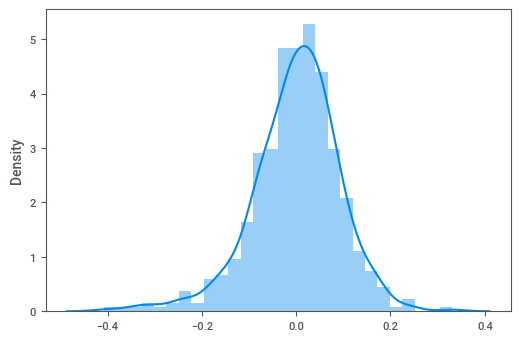

In [74]:
res = y_train - y_train_pred
sns.distplot(res)

- From above distribution plot the residuals are normally distributed with mean of 0. It looks fine.

- Check for Homoscedasticity: 

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


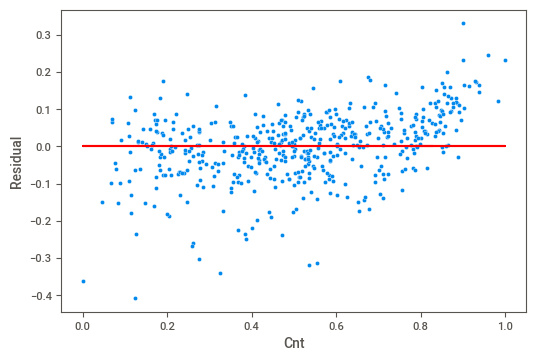

In [75]:
y_train_pred = lm_model7.predict(X_train_lm)
residual = y_train - y_train_pred
sns.scatterplot(y_train,residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Cnt')
plt.ylabel('Residual')
plt.show()

The above residuals plot shows data that are fairly homoscedastic. This residuals plot shows data that has linearity, and normality, and has the residual values along the centre.So this fairly meet the assumptions of homoscedasticity

# Step 5: Prediction & Model Evaluation on the test on Final Model

Scaling of features on Testset same as training set
Dont fit the test set.
- fit() will be invoked on train set where scaler was already fit

- transform() will be invoked on test set, where the train set scale is transformed

In [76]:
#create list of number variables for scaling
bike_data_numerical=bike_data[[ 'temp', 'atemp', 'hum', 'windspeed','cnt']]
numeric_vars = [ 'temp', 'atemp', 'hum', 'windspeed','cnt']
# 2. Fit on Data
bike_data_test[numeric_vars] = scaler.transform(bike_data_test[numeric_vars])
bike_data_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Aug,Dec,...,summer,winter,Mon,Sat,Sun,Thu,Tue,Wed,Light_Snow_Rain,Mist
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,1,0,0,0,0,0,0,1
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,0,...,1,0,0,0,0,0,0,1,0,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,0,1,0,0,0,1,0,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,1,0,...,0,0,0,0,0,0,0,1,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,0,...,1,0,0,0,0,1,0,0,0,0


In [77]:
#Check if the test data scale is readjusted
bike_data_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Aug,Dec,...,summer,winter,Mon,Sat,Sun,Thu,Tue,Wed,Light_Snow_Rain,Mist
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.532847,0.638221,0.313293,0.522154,0.059091,0.086364,...,0.263636,0.236364,0.127273,0.118182,0.145455,0.163636,0.168182,0.100000,0.027273,0.318182
std,0.500809,0.187620,0.459303,0.233187,0.217401,0.148694,0.159584,0.219163,0.236333,0.281541,...,0.441609,0.425817,0.334038,0.323559,0.353363,0.370789,0.374881,0.300684,0.163248,0.466833
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [78]:
#prepare X_test, and y_test varaibles for prediction
y_test = bike_data_test.pop('cnt')
X_test = bike_data_test

In [79]:
#add constant
X_test_sm = sm.add_constant(X_test)
X_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,Aug,Dec,Feb,...,summer,winter,Mon,Sat,Sun,Thu,Tue,Wed,Light_Snow_Rain,Mist
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0,0,0,...,0,0,1,0,0,0,0,0,0,1
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0,0,0,...,1,0,0,0,0,0,0,1,0,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0,0,0,...,0,1,0,0,0,1,0,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,1,0,0,...,0,0,0,0,0,0,0,1,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0,0,0,...,1,0,0,0,0,1,0,0,0,0


In [80]:
retain_columns=X_train_new.columns
X_test = X_test[retain_columns]
X_test.columns

Index(['yr', 'holiday', 'temp', 'windspeed', 'Sep', 'summer', 'winter',
       'Light_Snow_Rain', 'Mist'],
      dtype='object')

In [81]:
X_test.shape
X_test = sm.add_constant(X_test)

In [82]:
#predict with the final model prepared [lm_model4]
y_test_pred = lm_model7.predict(X_test)

In [83]:
#Calculate R-Squared for test set
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_test_pred)
round(r2,4)

0.7942

In [84]:
#Calculate Adusted R-Squared for test set:
adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)

0.7844


Text(0, 0.5, 'y_pred')

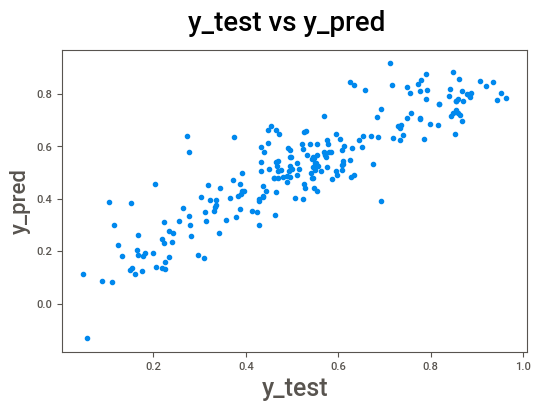

In [85]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          

As per the plot the spread looks good and there is no skewing between y_test and y_pred

# Final Linear Regression Equation:

`cnt` = 0.1259 + 0.2329* `yr` - 0.0987* `holiday` + 0.5480* `temp` - 0.1532 *  `windspeed` + 0.1012* `Sep` + 0.0881* `summer` +  0.1293* `winter` - 0.2829* `Light_Snow_Rain` - 0.0784* `Mist`



- **Top Variables (5 Variables) Significant in Predicting the Model**
  - **temp**: Temperature variable has highest coefficient value of `0.5480`. Which indicates a unit of increase in temperature increase the demand by 0.5480 units.
  - **wheathersit 3** (Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds) : This has a coefficient value of `-0.2829` indicats that, a unit increase in Weathersit3 variable decreases the demand  by 0.2829 units.
  - **yr**: The coefficiant of yr (year) is `0.2329`. Which indicates a increase of unit in year (2018 to 2019) increase the demand for bikes by 0.2329
  - **windspeed**: The coefficient of windspeed is `-0.1532`.Which incidates an increase of windspeed decreases the demand by 0.1532
  - **Season 4** (winter): The coefficient of winter is 0.1293. This indicates the winter season increase the demand for the bikes by 0.1293

# Comparision Of Training and Testing Data:
  - Train Fataset R-Squared: 0.830
  - Test Dataset  R-Squared: 0.7942
  - Train DataSet Adjusted-R-Squared:0.827
  - Test Dataset Adjusted-R-Squared :0.7844

As per above, the model is comparable in this case and explains about approx 80% of the varaince

**F-Statistics**: From the Model the value of F-Statistic is 271.9. Moreover p-value of all the variables is < 0.05, which indicates the model is significant.